In [1]:
# main_script.py

from imports import *


In [2]:
file_path = 'udataset.xlsx'
#file_path = "new.xlsx"

In [3]:
df = pd.read_excel(file_path)
df.head()

,Substance,Substance_lower,CAS_number,Smiles_code,Additional info,Irritation,Source
0,Heptanal,heptanal,111-71-7,CCCCCCC=O,-,I,Lukáš - 2006 Howard Maibach paper.pdf
1,Lilestralis/lilial,lilestralis/lilial,80-54-6,CC(CC1=CC=C(C=C1)C(C)(C)C)C=O,-,I,NaN
2,1-Bromopentane,1-bromopentane,110-53-2,CCCCCBr,-,I,NaN
3,dl-Citronellol,dl-citronellol,106-22-9,CC(CCC=C(C)C)CCO,-,I,NaN
4,d-Limonene,d-limonene,5989-27-5,CC1=CCC(CC1)C(=C)C,-,I,NaN


In [4]:
def calculate_descriptors(df):
    # List to hold descriptor data for each row
    descriptor_data = []
    
    for smiles in df['Smiles_code']:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            # Append a dictionary of None values for all descriptors if SMILES is invalid
            descriptor_data.append({desc[0]: None for desc in Descriptors.descList})
            continue
        
        descriptors = {}
        for descriptor, function in Descriptors.descList:
            try:
                descriptors[descriptor] = function(mol)
            except Exception:
                descriptors[descriptor] = None
        
        descriptor_data.append(descriptors)
    
    # Create a DataFrame for descriptor values with the same index as the original DataFrame
    descriptors_df = pd.DataFrame(descriptor_data, index=df.index)
    
    # Concatenate original DataFrame with descriptor DataFrame
    df = pd.concat([df, descriptors_df], axis=1)
    
    return df

In [5]:
df = calculate_descriptors(df)

[16:09:40] WARNING: not removing hydrogen atom without neighbors
[16:09:40] WARNING: not removing hydrogen atom without neighbors
[16:09:40] WARNING: not removing hydrogen atom without neighbors


In [6]:
df.shape

(446, 217)

In [7]:
columns_to_drop = ["Substance", "Substance_lower", "CAS_number", "Smiles_code", "Additional info", "Source"]

# Drop the columns using the drop() method with axis=1 (columns)
df = df.drop(columns_to_drop, axis=1)
df.head()

,Irritation,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,I,9.768009,9.768009,0.750000,0.750000,0.395123,9.125000,114.188,100.076,114.104465,...,0,0,0,0,0,0,0,0,3,0
1,I,10.535393,10.535393,0.116191,0.116191,0.689906,13.600000,204.313,184.153,204.151415,...,0,0,0,0,0,0,0,0,0,0
2,I,3.350347,3.350347,1.167500,1.167500,0.429137,9.000000,151.047,139.959,150.004412,...,0,0,0,0,0,0,0,0,1,0
3,I,8.629773,8.629773,0.329353,0.329353,0.606746,12.727273,156.269,136.109,156.151415,...,0,0,0,0,0,0,0,0,0,0
4,I,3.974575,3.974575,0.767315,0.767315,0.485034,25.800000,136.238,120.110,136.125201,...,0,0,0,0,0,0,0,0,0,0


In [8]:
columns_to_drop = ["BCUT2D_MWHI", "BCUT2D_MWLOW", "BCUT2D_CHGHI", "BCUT2D_CHGLO", "BCUT2D_LOGPHI", "BCUT2D_LOGPLOW", "BCUT2D_MRHI", "BCUT2D_MRLOW"]

# Drop the columns using the drop() method with axis=1 (columns)
df = df.drop(columns_to_drop, axis=1)

In [9]:
df['Irritation'] = df['Irritation'].replace({'I': 1, 'NI': 0})
df.head()

/var/folders/n4/lx5wz8kj2r79g9p8wxdnqk580000gn/T/ipykernel_50295/3730350621.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Irritation'] = df['Irritation'].replace({'I': 1, 'NI': 0})


,Irritation,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,1,9.768009,9.768009,0.750000,0.750000,0.395123,9.125000,114.188,100.076,114.104465,...,0,0,0,0,0,0,0,0,3,0
1,1,10.535393,10.535393,0.116191,0.116191,0.689906,13.600000,204.313,184.153,204.151415,...,0,0,0,0,0,0,0,0,0,0
2,1,3.350347,3.350347,1.167500,1.167500,0.429137,9.000000,151.047,139.959,150.004412,...,0,0,0,0,0,0,0,0,1,0
3,1,8.629773,8.629773,0.329353,0.329353,0.606746,12.727273,156.269,136.109,156.151415,...,0,0,0,0,0,0,0,0,0,0
4,1,3.974575,3.974575,0.767315,0.767315,0.485034,25.800000,136.238,120.110,136.125201,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Count the number of rows before dropping NaN values
num_rows_before = df.shape[0]

# Drop rows with NaN values
df.dropna(inplace=True)

# Count the number of rows after dropping NaN values
num_rows_after = df.shape[0]

# Calculate the number of rows dropped
num_rows_dropped = num_rows_before - num_rows_after

print("Number of rows dropped:", num_rows_dropped)

Number of rows dropped: 4


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 442 entries, 0 to 444
Columns: 203 entries, Irritation to fr_urea
dtypes: float64(98), int64(105)
memory usage: 704.4 KB


In [12]:
df.nunique()

Irritation             2
MaxAbsEStateIndex    363
MaxEStateIndex       363
MinAbsEStateIndex    335
MinEStateIndex       363
                    ... 
fr_thiazole            2
fr_thiocyan            2
fr_thiophene           2
fr_unbrch_alkane      16
fr_urea                3
Length: 203, dtype: int64

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Irritation,442.0,0.506787,0.500520,0.000000,0.000000,1.000000,1.000000,1.000000
MaxAbsEStateIndex,442.0,9.657358,3.134802,0.000000,8.525023,10.216210,11.799866,15.069647
MaxEStateIndex,442.0,9.654812,3.134143,0.000000,8.525023,10.210840,11.799866,15.069647
MinAbsEStateIndex,442.0,0.367896,0.706031,0.000000,0.047736,0.180782,0.386586,6.000000
MinEStateIndex,442.0,-1.207792,1.890500,-11.027778,-1.583044,-0.649205,0.000000,6.000000
...,...,...,...,...,...,...,...,...
fr_thiazole,442.0,0.006787,0.082198,0.000000,0.000000,0.000000,0.000000,1.000000
fr_thiocyan,442.0,0.002262,0.047565,0.000000,0.000000,0.000000,0.000000,1.000000
fr_thiophene,442.0,0.009050,0.094806,0.000000,0.000000,0.000000,0.000000,1.000000
fr_unbrch_alkane,442.0,0.778281,2.363878,0.000000,0.000000,0.000000,0.000000,15.000000


In [14]:
# Step 1: Remove constant columns
constant_columns = df.columns[df.nunique() <= 1]  # Columns with 1 or fewer unique values
print(f"Constant columns removed: {list(constant_columns)}")
df = df.drop(columns=constant_columns)

Constant columns removed: ['SMR_VSA8', 'SlogP_VSA9', 'fr_HOCCN', 'fr_N_O', 'fr_Ndealkylation2', 'fr_azide', 'fr_azo', 'fr_barbitur', 'fr_benzodiazepine', 'fr_diazo', 'fr_dihydropyridine', 'fr_epoxide', 'fr_furan', 'fr_isocyan', 'fr_isothiocyan', 'fr_lactam', 'fr_nitroso', 'fr_oxazole', 'fr_piperdine', 'fr_prisulfonamd', 'fr_tetrazole']


In [15]:
def detect_outliers(df):
    if isinstance(df, np.ndarray):
        df = pd.DataFrame(df)
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outlier_mask = (df < lower_bound) | (df > upper_bound)
    
    # Replace outliers with median
    median_values = df.median(axis=1)
    df = df.where(~outlier_mask, median_values, axis=0)


    outliers = df[outlier_mask.any(axis=1)]
    num_outliers = outliers.shape[0]
    print(f"Number of outliers detected: {num_outliers}")

    return df

In [16]:
df = detect_outliers(df)

Number of outliers detected: 439


/var/folders/n4/lx5wz8kj2r79g9p8wxdnqk580000gn/T/ipykernel_50295/1934217254.py:20: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.where(~outlier_mask, median_values, axis=0)


In [17]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the DataFrame
normalized_data = scaler.fit_transform(df)

# Convert the scaled data back to a DataFrame
df = pd.DataFrame(normalized_data, columns=df.columns)

df.head()

,Irritation,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,...,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,1.0,0.648191,0.648191,0.841558,0.784395,0.378529,0.466241,0.209837,0.182926,0.210562,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.699113,0.699113,0.130376,0.675074,0.713980,0.694891,0.375455,0.337557,0.376730,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.000000,0.000000,0.000000,0.856407,0.417235,0.459854,0.277571,0.256277,0.276810,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.572659,0.572659,0.369560,0.711841,0.619348,0.650299,0.287167,0.249197,0.288153,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.263747,0.263747,0.860987,0.787382,0.480844,0.000000,0.250357,0.219772,0.251198,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:

def feature_selection(df):
    nonzero_thrd=0.01
    cor_thrd=0.9
    print(f"Original shape of data: {df.shape}")
    
    # Step 1: Remove features with low variance
    nonzero_df = df.loc[:, df.var() > nonzero_thrd]
    print(f"Removed {df.shape[1] - nonzero_df.shape[1]} features with variance <= {nonzero_thrd}")
    
    # Step 2: Remove highly correlated features
    corr_matrix = nonzero_df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > cor_thrd)]
    print(f"Removed {len(to_drop)} highly correlated features with correlation > {cor_thrd}")
    
    # Step 3: Return the cleaned dataset
    cleaned_df = nonzero_df.drop(to_drop, axis=1)
    print(f"Final shape of data: {cleaned_df.shape}")
    return cleaned_df


df = feature_selection(df)
df.head()

Original shape of data: (442, 182)
Removed 42 features with variance <= 0.01
Removed 27 highly correlated features with correlation > 0.9
Final shape of data: (442, 113)


,Irritation,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,...,fr_aryl_methyl,fr_bicyclic,fr_ester,fr_ether,fr_halogen,fr_methoxy,fr_para_hydroxylation,fr_pyridine,fr_sulfonamd,fr_urea
0,1.0,0.648191,0.841558,0.784395,0.378529,0.466241,0.209837,0.232062,0.287844,0.303403,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.699113,0.130376,0.675074,0.713980,0.694891,0.375455,0.234795,0.288090,0.303088,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.000000,0.000000,0.856407,0.417235,0.459854,0.277571,0.130574,0.524527,0.000000,...,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,1.0,0.572659,0.369560,0.711841,0.619348,0.650299,0.287167,0.165618,0.215324,0.396366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.263747,0.860987,0.787382,0.480844,0.000000,0.250357,0.112937,0.524527,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
skewness_values = df.skew()
skewness_df = skewness_values.reset_index()
skewness_df.columns = ['Feature', 'Skewness']
skewness_df.sort_values(by="Skewness", inplace=True)
print(skewness_df)

skewed_features = skewness_df[skewness_df['Skewness'].abs() > 2]
print(len(skewed_features))


                      Feature  Skewness
12           FpDensityMorgan2 -1.505296
13           FpDensityMorgan3 -1.339762
1           MaxAbsEStateIndex -1.326362
3              MinEStateIndex -1.133205
15                   BalabanJ -0.928141
..                        ...       ...
100           fr_allylic_oxid  6.187923
94                     fr_COO  7.213499
88   NumSaturatedHeterocycles  7.380286
92                   fr_Al_OH  7.980477
93                   fr_Ar_NH  8.262037

[113 rows x 2 columns]
35


In [20]:

for index, row in skewness_df.iterrows():
    feature = row['Feature']
    skewness = row['Skewness']
    
    # Right-skewed: Skewness > 1
    if skewness > 1:
        print(f"Transforming {feature} (right-skewed)...")
        # Use log1p (handles zeros safely)
        df[feature] = np.sqrt(df[feature])
    
    # Left-skewed: Skewness < -1
    elif skewness < -1:
        print(f"Transforming {feature} (left-skewed)...")
        # Use Yeo-Johnson transformation for negative skew
        scaler = PowerTransformer(method='yeo-johnson')
        df[feature] = scaler.fit_transform(df[[feature]])
    
    # No significant skewness: Leave the feature as is
    else:
        print(f"{feature} has no significant skewness, skipping transformation.")


Transforming FpDensityMorgan2 (left-skewed)...
Transforming FpDensityMorgan3 (left-skewed)...
Transforming MaxAbsEStateIndex (left-skewed)...
Transforming MinEStateIndex (left-skewed)...
BalabanJ has no significant skewness, skipping transformation.
MaxAbsPartialCharge has no significant skewness, skipping transformation.
SPS has no significant skewness, skipping transformation.
AvgIpc has no significant skewness, skipping transformation.
MinAbsPartialCharge has no significant skewness, skipping transformation.
HallKierAlpha has no significant skewness, skipping transformation.
VSA_EState5 has no significant skewness, skipping transformation.
MolLogP has no significant skewness, skipping transformation.
Irritation has no significant skewness, skipping transformation.
qed has no significant skewness, skipping transformation.
FractionCSP3 has no significant skewness, skipping transformation.
FpDensityMorgan1 has no significant skewness, skipping transformation.
PEOE_VSA1 has no significa

In [21]:
skewness_values = df.skew()
skewness_df = skewness_values.reset_index()
skewness_df.columns = ['Feature', 'Skewness']
skewness_df.sort_values(by="Skewness", inplace=True)
print(skewness_df)

skewed_features = skewness_df[skewness_df['Skewness'].abs() > 2]
print(len(skewed_features))


                      Feature  Skewness
15                   BalabanJ -0.928141
9         MaxAbsPartialCharge -0.885387
5                         SPS -0.721467
14                     AvgIpc -0.599337
10        MinAbsPartialCharge -0.387006
..                        ...       ...
100           fr_allylic_oxid  5.776803
94                     fr_COO  6.289525
88   NumSaturatedHeterocycles  6.808082
92                   fr_Al_OH  6.837903
93                   fr_Ar_NH  8.021392

[113 rows x 2 columns]
32


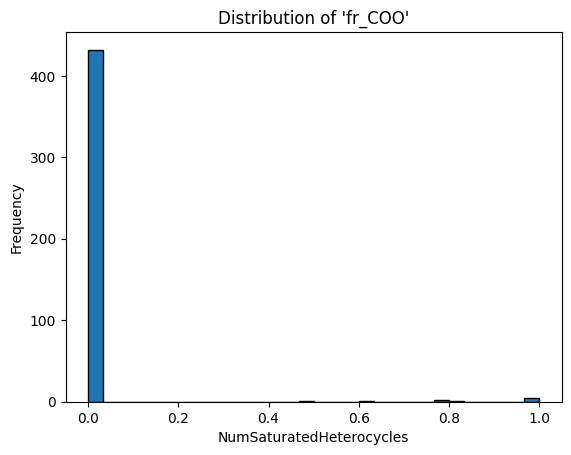

In [22]:
# Plot the histogram
plt.hist(df['NumSaturatedHeterocycles'], bins=30, edgecolor='black')
plt.title("Distribution of 'fr_COO'")
plt.xlabel("NumSaturatedHeterocycles")
plt.ylabel("Frequency")
plt.show()

In [23]:
# Calculate percentage of each unique value
value_percentages = df['fr_COO'].value_counts(normalize=True) * 100

# Display as a DataFrame
percentage_df = value_percentages.reset_index()
percentage_df.columns = ['Value', 'Percentage']

print(percentage_df)

       Value  Percentage
0   0.000000   96.606335
1   0.948683    0.904977
2   1.000000    0.452489
3   0.239008    0.226244
4   0.536922    0.226244
5   0.519515    0.226244
6   0.195435    0.226244
7   0.915058    0.226244
8   0.262790    0.226244
9   0.522040    0.226244
10  0.393649    0.226244
11  0.618999    0.226244


In [24]:
# Calculate Pearson correlation
correlation = df['fr_COO'].corr(df['Irritation'], method='pearson')
print(f"Pearson Correlation: {correlation}")

# Calculate Spearman correlation (for non-linear relationships)
spearman_corr = df['fr_COO'].corr(df['Irritation'], method='spearman')
print(f"Spearman Correlation: {spearman_corr}")


Pearson Correlation: -0.03998449316259215
Spearman Correlation: -0.08773960809903153


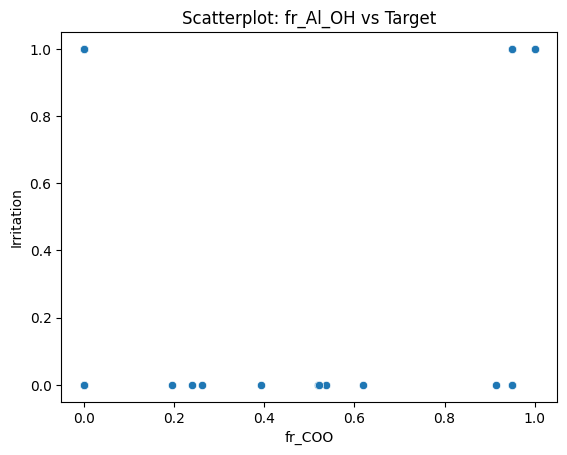

In [25]:
sns.scatterplot(x=df['fr_COO'], y=df['Irritation'])
plt.title("Scatterplot: fr_Al_OH vs Target")
plt.show()


In [26]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Fit the model
model = RandomForestRegressor()
model.fit(df.drop('Irritation', axis=1), df['Irritation'])

# Get feature importances
importance = model.feature_importances_

# Create a DataFrame to view the feature importances
feature_importance = pd.DataFrame({'Feature': df.columns[:-1], 'Importance': importance})

# Sort the features by importance in descending order
print(feature_importance.sort_values(by='Importance', ascending=False))


                     Feature  Importance
16                   BertzCT    0.140694
13          FpDensityMorgan3    0.120207
52                SlogP_VSA8    0.040172
20                    Kappa3    0.028342
9        MaxAbsPartialCharge    0.024834
..                       ...         ...
24                PEOE_VSA12    0.000084
97                    fr_NH0    0.000000
77   NumAliphaticCarbocycles    0.000000
109    fr_para_hydroxylation    0.000000
87   NumSaturatedCarbocycles    0.000000

[112 rows x 2 columns]


In [27]:
importance_of_fr_Ar_NH = feature_importance[feature_importance['Feature'] == 'fr_COO']['Importance'].values[0]
print(f"Importance of 'fr_COO': {importance_of_fr_Ar_NH}")


Importance of 'fr_COO': 0.0034447136281037915


In [28]:
columns_to_drop = ["fr_Ar_NH", "fr_Al_OH", "NumSaturatedHeterocycles", "fr_COO"]
df = df.drop(columns_to_drop, axis=1)

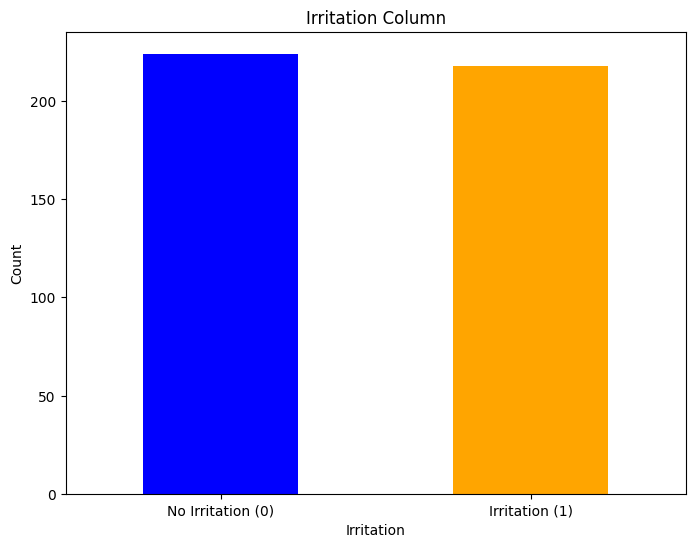

In [29]:
# Plotting class imbalance
plt.figure(figsize=(8, 6))
df['Irritation'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Irritation Column')
plt.xlabel('Irritation')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Irritation (0)', 'Irritation (1)'], rotation=0)
plt.show()

In [30]:
df.shape

(442, 109)

In [31]:
import os

# Define the file name (you can customize it)
file_name = "cleaned_df.xlsx"

# Export the DataFrame to Excel
df.to_excel(file_name, index=False)  # index=False excludes the index column

# Optionally, you can confirm the file was saved in the current directory
print(f"File saved to: {os.path.abspath(file_name)}")


File saved to: /Users/monika/Desktop/DP/DP-QSAR-Skin-Irritation/cleaned_df.xlsx
